# Método de regresión por Mínimos cuadrados.

 La regresión por mínimos cuadrados es un método utilizado para encontrar la mejor línea de ajuste para un conjunto de puntos de datos.

 La regresión por mínimos cuadrados es una técnica estadística y numérica utilizada para analizar y modelar la relación entre una variable dependiente y una o más variables independientes. Su objetivo principal es encontrar la mejor línea (o superficie, en el caso de múltiples variables independientes) que se ajuste a un conjunto de datos.

 <img src="https://www.marionomics.com/content/images/image/fetch/w_1200,h_600,c_limit,f_jpg,q_auto:good,fl_progressive:steep/https-3a-2f-2fsubstack-post-media.s3.amazonaws.com-2fpublic-2fimages-2f742471f3-2dc4-498c-9a0d-b45cfb400ebb_1024x768.jpg"/>



## Algoritmo de la regresión por mínimos cuadrados

La línea de regresión lineal tiene la forma
$$Y = mX + b$$

Donde $m$ es la pendiente de la recta, $b$ es el intercepto (bias) de la recta

1. **Datos de entrada $(X_n, Y_n,)$**
2. Calcular las sumatorias
$$∑_X$$
$$∑_Y$$
$$∑_{X^2}$$
$$∑_{XY}$$

3. Calcular pendiente e intercepto

$$m = \frac{n∑_{XY} - ∑_X ∑_Y}{n∑_{X^2} -(∑_X)^2}$$

Donde $n$ es la cantidad total de datos.

$$b = \frac{∑_Y- m∑_X}{n}$$

## Cálculo de error de una regresión por mínimos cuadrados:

Revisar el error en la regresión por mínimos cuadrados es esencial para determinar qué tan bien se ajusta el modelo a los datos observados.

### Error cuadrático médio (ECM)
El error cuadrático medio (ECM) de un estimador mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. El ECM es una función de riesgo, correspondiente al valor esperado de la pérdida del error al cuadrado o pérdida cuadrática.

Si $\hat{Y}$ es un vector de n predicciones y $Y$ es el vector de los verdaderos valores, entonces el (estimado) ECM del predictor es:

$$ECM = \frac{1}{n}∑_{i=1}^{n} (Y_{i} - \hat{Y}_{i} )^2$$

### $R^2$: Coeficiente de determinación

El coeficiente de determinación es una medida estadística que examina cómo las diferencias en una variable pueden ser explicadas por la diferencia en una segunda variable, al predecir el resultado de un evento determinado. En otras palabras, este coeficiente, que se conoce más comúnmente como R-cuadrado (o R2), evalúa la fuerza de la relación lineal entre dos variables, y es muy utilizado por los investigadores cuando realizan análisis de tendencias.

$$R^2 = 1 - \frac{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2}$$

## Vamos a ver un ejemplo con los datos

In [2]:
import pandas as pd
data = {"X":[1,2,3,4,5,6,7,8],"Y":[50, 60, 65, 70, 85, 90, 92, 95]}
df = pd.DataFrame(data)
df.head(9)

,X,Y
0,1,50
1,2,60
2,3,65
3,4,70
4,5,85
5,6,90
6,7,92
7,8,95


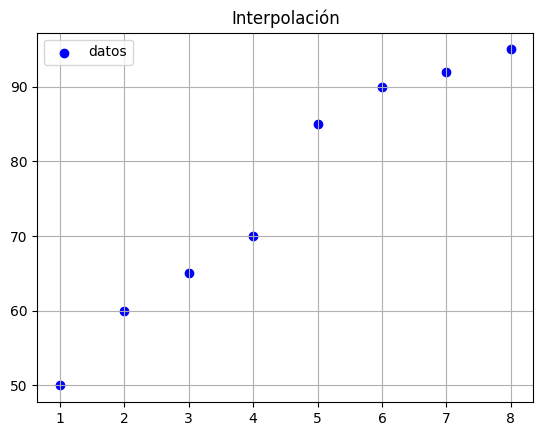

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(df["X"].to_list(),df["Y"].to_list(),color='blue',label="datos")

ax.set_title("Interpolación")
ax.grid()
ax.legend()
plt.show()

In [8]:
# Calculamos las sumatorias y la pendiente y el intercepto de la recta.

x = np.array(df["X"])
y = np.array(df["Y"])

sx = np.sum(x)
sy = np.sum(y)

sx2 = np.sum(x**2)
sxy = np.sum(x*y)

n = len(x)

m = ((n*sxy) - (sx*sy))/((n*sx2)-(sx**2))
b = (sy -(m*sx))/n

print("Pendiente: ",m,"; intercepto: ",b)

Pendiente:  6.726190476190476 ; intercepto:  45.60714285714286


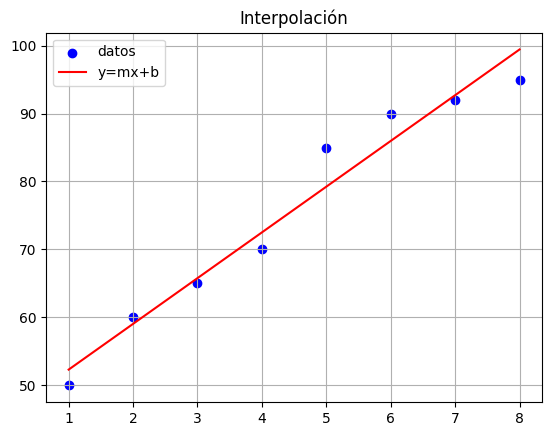

In [10]:
fig, ax = plt.subplots()

# vamos a verificar como se realizó la interpolación
recta = m*x + b

ax.scatter(df["X"].to_list(),df["Y"].to_list(),color='blue',label="datos")
ax.plot(x,recta,color='red',label="y=mx+b")

ax.set_title("Interpolación")
ax.grid()
ax.legend()
plt.show()

In [11]:
## vamos a calcular las métricas de error.
from sklearn.metrics import r2_score, mean_absolute_error

# Calcular R^2
r2 = r2_score(y, recta)
print(f"R^2: {r2}")

# Calcular MAE
mae = mean_absolute_error(y, recta)
print(f"MAE: {mae}")

R^2: 0.9582796744745935
MAE: 2.684523809523811


## Ejercicio

Realice un programa para leer un documento `csv` de dos columnas y que realice automáticamente la regresión por mínimos cuadrados de un archivo. Muestre los errores y grafique la regresión lineal.